<a href="https://colab.research.google.com/github/PreciousAkpokighe/Churn-Prediction-Platform-Capstone-Design/blob/main/Self_study_try_it_activity_6_1_Ranking_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Self-study try-it activity 6.1: Ranking in Python

In [1]:
import numpy as np
import pathlib as pl
import os
import pandas as pd
import matplotlib.pyplot as plt

# Using lift charts for university ranking in regression tasks

In this notebook, you'll explore how to use lift charts to evaluate models for ranking regression tasks. The data set is based on the [Times World University Rankings](https://www.timeshighereducation.com/world-university-rankings/2022/world-ranking#!/page/0/length/25/sort_by/rank/sort_order/asc/cols/stats) from 2022.

You'll generate lift charts to assess how effectively different predictors, including number of students, student–staff ratio and research performance, can predict a university’s overall ranking. The data has been converted into rankings for each category.

## Load the data

In [3]:
data = pd.read_csv('Uni_Ranking.csv')

data.shape

(200, 6)

There are six columns in the data set. Only three columns (`research_rank`,`student_staff_ratio_rank` and `num_students_rank`) are retained for the lift chart.

In [ ]:
#The cols parameter gives you the list  ['research_rank', 'student_staff_ratio_rank', 'num_students_rank']
cols = list(data.columns)



In [5]:
cols = list(data.columns)
cols.remove('university_name')
cols.remove('world_rank')
cols.remove('Unnamed: 0')
print(cols)

['research_rank', 'student_staff_ratio_rank', 'num_students_rank']


## Section 1: Lift chart for the number of students

### Prompt 1: Plot the lift chart for the number of students.

Remember to include the average classifier, the perfect classifier and a legend for your plot. Replace the `None` with your code.

In [ ]:

fig = plt.figure(figsize=(10,10))
model1_df = None

# Invert the world_rank so higher means better by taking reciprocal
model1_df['inv_world_rank'] = None
perf['inv_world_rank'] = None

perf = None
model1_df['cumulative'] = None
perf['cumulative'] = None

cumulative = None
cumulative_perf = None
plt.step(range(len(model1_df)+1), cumulative, label='num_students_rank')
plt.step(range(len(model1_df)+1), cumulative_perf, label='perfect regressor')
plt.plot(np.array([0, 200]), np.array([0, np.sum(data['world_rank'])]), label='random regressor')
plt.legend()


## Section 2: Lift charts for all models

### Prompt 2: Plot the lift charts for models one, two and three on the same graph.

Remember to include the average classifier, the perfect classifier and a legend for your plot. Replace the `None` with your code.

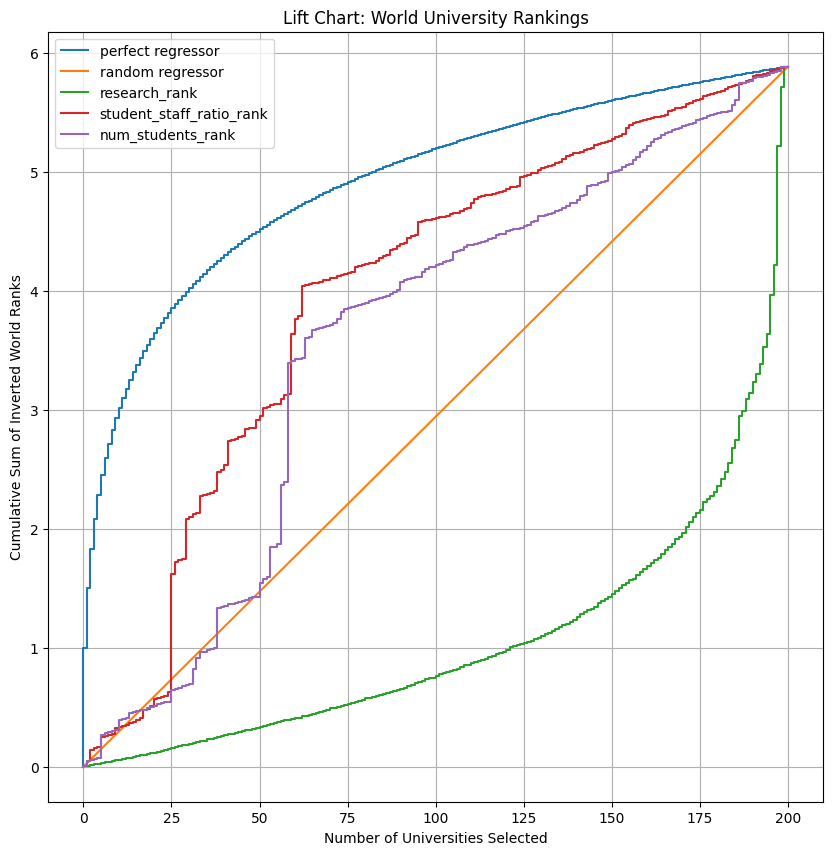

In [7]:
models = cols

fig = plt.figure(figsize=(10,10))

# --- Pre-calculate inverted world rank for all models, perfect, and random regressors ---
# Create a working copy of the data
working_data = data.copy()
# Invert world_rank so higher values mean better performance for lift chart
working_data['inv_world_rank'] = 1 / working_data['world_rank']

# --- Perfect Regressor Curve Calculation ---
# Sort the working data by the actual inverted world rank (highest inverted rank first)
perf_regressor_df = working_data.sort_values(by='inv_world_rank', ascending=False).reset_index(drop=True)
# Calculate the cumulative sum of the inverted world ranks
# Prepend 0 to the list to align with the x-axis starting from 0 universities
cumulative_perf_values = [0] + perf_regressor_df['inv_world_rank'].cumsum().tolist()
# Plot the perfect regressor
plt.step(range(len(perf_regressor_df) + 1), cumulative_perf_values, label='perfect regressor')

# --- Random Regressor Curve Calculation ---
# The random regressor is a straight line from (0,0) to (total_universities, total_sum_of_inv_world_ranks)
total_universities = len(working_data)
total_inv_world_rank_sum = working_data['inv_world_rank'].sum()
plt.plot(np.array([0, total_universities]), np.array([0, total_inv_world_rank_sum]), label='random regressor')

# --- Loop through each model to plot its lift curve ---
for model in models:
    # Create a temporary DataFrame for the current model, including its rank and the inverted world rank
    model_df = working_data[[model, 'inv_world_rank']].copy()
    # Sort by the current model's rank.
    # Following the prompt in cell 07fefca2, `num_students_rank` was sorted `ascending=False`.
    # This implies that for the model's rank, a higher rank value is treated as better for sorting in this context.
    model_df = model_df.sort_values(by=model, ascending=False).reset_index(drop=True)
    # Calculate the cumulative sum of inverted world ranks for this model
    cumulative_model_values = [0] + model_df['inv_world_rank'].cumsum().tolist()
    # Plot the current model's lift curve
    plt.step(range(len(model_df) + 1), cumulative_model_values, label=model)

# --- Final Plotting ---
plt.title('Lift Chart: World University Rankings')
plt.xlabel('Number of Universities Selected')
plt.ylabel('Cumulative Sum of Inverted World Ranks')
plt.legend()
plt.grid(True)
plt.show()

### Prompt 3: How does each model perform in comparison to the perfect and average regressor? Which model performs the best?

In [9]:
## student_staff_ratio_rank